In [4]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.10.0


In [2]:
#Importing Dataset

In [5]:
imdb = keras.datasets.imdb

(train_data,train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [6]:
print('Size of Training data ', len(train_data))
print('Size of Test data ', len(test_data))

Size of Training data  25000
Size of Test data  25000


In [7]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [8]:
print('Size of first training example ', len(train_data[0]))
print('Size of first test example ', len(test_data[0]))

Size of first training example  218
Size of first test example  68


In [9]:
#Process the Data

In [11]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                         value=0,
                                                         padding='post',
                                                         maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                        value=0,
                                                        padding='post',
                                                        maxlen=256)

In [14]:
print('Size of training data', len(train_data[0]))
print(train_data[0])

Size of training data 256
[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28 

In [15]:
#Build the model

In [16]:
model = keras.Sequential()

model.add(keras.layers.Embedding(10000, 16))
model.add(keras.layers.GlobalAveragePooling1D())

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
Total params: 160,000
Trainable params: 160,000
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [20]:
#Train the model

In [21]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=40,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                   verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 3s 175us/step - loss: 0.7240 - acc: 0.5058 - val_loss: 0.6912 - val_acc: 0.5313
Epoch 2/40
15000/15000 [==============================] - 1s 91us/step - loss: 0.6897 - acc: 0.5491 - val_loss: 0.6881 - val_acc: 0.5796
Epoch 3/40
15000/15000 [==============================] - 1s 91us/step - loss: 0.6856 - acc: 0.6008 - val_loss: 0.6850 - val_acc: 0.5995
Epoch 4/40
15000/15000 [==============================] - 1s 91us/step - loss: 0.6819 - acc: 0.6563 - val_loss: 0.6815 - val_acc: 0.6188
Epoch 5/40
15000/15000 [==============================] - 1s 91us/step - loss: 0.6775 - acc: 0.6625 - val_loss: 0.6766 - val_acc: 0.6957
Epoch 6/40
15000/15000 [==============================] - 1s 92us/step - loss: 0.6720 - acc: 0.7238 - val_loss: 0.6709 - val_acc: 0.7208
Epoch 7/40
15000/15000 [==============================] - 1s 94us/step - loss: 0.6647 - acc: 0.7437 - val_loss: 0.6639 - val_ac

In [22]:
#Testing the model

In [23]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Accuracy on the test set: ', test_acc)

25000/25000 [==============================] - 1s 23us/step
Accuracy on the test set:  0.87588


In [24]:
#Plot loss and Accuracy 

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

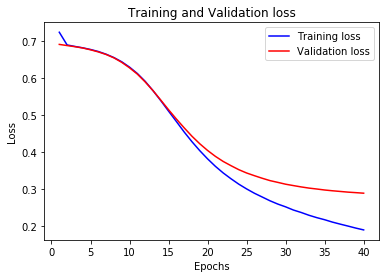

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history_dict['acc']
loss = history_dict['loss']
val_acc = history_dict['val_acc']
val_loss = history_dict['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

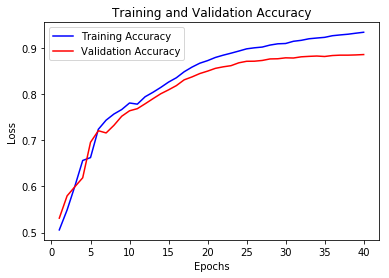

In [29]:
plt.clf()
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()